In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report

%matplotlib inline

# load data

In [2]:
df=pd.read_csv("/kaggle/input/chydv-hackathon-2025/train.csv")

In [3]:
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.7,0.61,0.00,2.1,0.088,10.0,26.0,0.99580,3.26,0.61,9.4,6.0
1,1,7.4,0.50,0.00,2.6,0.080,11.0,86.0,0.99760,3.36,0.54,9.2,6.0
2,2,5.5,0.64,0.02,1.7,0.073,12.0,27.0,0.99704,3.53,0.54,12.0,7.0
3,3,7.1,0.45,0.42,2.2,0.078,21.0,53.0,0.99578,3.02,0.53,9.5,5.0
4,4,8.7,0.63,0.18,2.4,0.077,11.0,26.0,0.99710,3.25,0.61,10.0,6.0


In [4]:
df.isnull().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(15000, 13)

In [6]:
df.drop(columns=["id"],axis=1,inplace=True)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8.150753,0.504877,0.232211,2.199445,0.078960,13.227133,37.122767,0.996915,3.322869,0.619162,10.186511,5.660533
std,1.420983,0.135287,0.176862,0.533989,0.015611,7.899479,23.806699,0.001392,0.115947,0.106109,0.900831,0.808541
min,4.000000,0.180000,0.000000,1.100000,0.000000,1.000000,5.000000,0.990640,2.860000,0.390000,8.100000,3.000000
25%,7.200000,0.400000,0.050000,1.900000,0.073000,6.000000,19.000000,0.995900,3.240000,0.550000,9.500000,5.000000
50%,7.800000,0.500000,0.240000,2.100000,0.078000,12.000000,31.000000,0.996800,3.320000,0.600000,9.900000,6.000000
75%,8.900000,0.600000,0.380000,2.400000,0.084000,17.000000,48.000000,0.997800,3.390000,0.670000,10.800000,6.000000
max,37.000000,1.340000,0.760000,11.700000,0.415000,55.000000,289.000000,1.003690,4.010000,1.610000,14.000000,8.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         15000 non-null  float64
 1   volatile acidity      15000 non-null  float64
 2   citric acid           15000 non-null  float64
 3   residual sugar        15000 non-null  float64
 4   chlorides             15000 non-null  float64
 5   free sulfur dioxide   15000 non-null  float64
 6   total sulfur dioxide  15000 non-null  float64
 7   density               15000 non-null  float64
 8   pH                    15000 non-null  float64
 9   sulphates             15000 non-null  float64
 10  alcohol               15000 non-null  float64
 11  quality               15000 non-null  float64
dtypes: float64(12)
memory usage: 1.4 MB


In [9]:
df["quality"].value_counts()

quality
5.0    6259
6.0    6108
7.0    1889
4.0     450
8.0     212
3.0      82
Name: count, dtype: int64

In [10]:
continuous_features = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid', 
    'residual sugar', 
    'chlorides', 
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density', 
    'pH', 
    'sulphates', 
    'alcohol']


# Scale Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.112121,0.370690,0.000000,0.094340,0.212048,0.166667,0.073944,0.395402,0.347826,0.180328,0.220339,6.0
1,0.103030,0.275862,0.000000,0.141509,0.192771,0.185185,0.285211,0.533333,0.434783,0.122951,0.186441,6.0
2,0.045455,0.396552,0.026316,0.056604,0.175904,0.203704,0.077465,0.490421,0.582609,0.122951,0.661017,7.0
3,0.093939,0.232759,0.552632,0.103774,0.187952,0.370370,0.169014,0.393870,0.139130,0.114754,0.237288,5.0
4,0.142424,0.387931,0.236842,0.122642,0.185542,0.185185,0.073944,0.495019,0.339130,0.180328,0.322034,6.0


# Resample data

In [13]:
from sklearn.utils import resample
majority_class = df[df["quality"] == 5.0]
majority_class_2=df[df["quality"]==6.0]
minority_class_3=df[df["quality"]==3.0]
minority_class_7=df[df["quality"]==7.0]
minority_class_4 = df[df["quality"] == 4.0]
minority_class_8 = df[df["quality"] == 8.0]
class_3_upsample=resample(minority_class_3,replace=True,n_samples=len(majority_class),random_state=42)
class_4_upsample=resample(minority_class_4,replace=True,n_samples=len(majority_class),random_state=42)
class_7_upsample=resample(minority_class_7,replace=True,n_samples=len(majority_class),random_state=42)
class_8_upsample=resample(minority_class_8,replace=True,n_samples=len(majority_class),random_state=42)

df_balanced = pd.concat([majority_class,majority_class_2,class_3_upsample, class_4_upsample, class_7_upsample, class_8_upsample])

In [14]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
df_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.148485,0.362069,0.447368,0.066038,0.180723,0.166667,0.066901,0.521839,0.260870,0.319672,0.694915,8.0
1,0.157576,0.112069,0.657895,0.235849,0.202410,0.166667,0.073944,0.472031,0.434783,0.204918,1.000000,4.0
2,0.072727,0.387931,0.368421,0.084906,0.187952,0.166667,0.066901,0.495019,0.365217,0.180328,0.220339,3.0
3,0.084848,0.362069,0.131579,0.141509,0.132530,0.092593,0.024648,0.331034,0.426087,0.213115,0.508475,6.0
4,0.154545,0.362069,0.513158,0.075472,0.216867,0.166667,0.080986,0.533333,0.269565,0.311475,0.237288,8.0


In [16]:
df_balanced.shape

(37403, 12)

In [17]:
df_balanced.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df_balanced["quality"].value_counts()

quality
8.0    6259
4.0    6259
3.0    6259
5.0    6259
7.0    6259
6.0    6108
Name: count, dtype: int64

In [19]:
X=df_balanced.drop(columns=["quality"],axis=1)
y=df_balanced["quality"]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# CatBoost Classifier

In [21]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=2000, learning_rate=0.05, depth=8,verbose=500,early_stopping_rounds=50)

model.fit(X_train, y_train)

0:	learn: 1.7709674	total: 91.5ms	remaining: 3m 2s
500:	learn: 0.5336156	total: 10.9s	remaining: 32.7s
1000:	learn: 0.3400588	total: 21.8s	remaining: 21.7s
1500:	learn: 0.2453563	total: 32.9s	remaining: 10.9s
1999:	learn: 0.1850016	total: 43.8s	remaining: 0us


# Model Accuracy And Kappa Score

In [22]:
y_pred = model.predict(X_test)  

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred,weights='quadratic')
print(f"Cohen's Kappa score: {kappa}")

Accuracy: 0.8346477743617163
Cohen's Kappa score: 0.9649939401174757


# Classification report

In [23]:
class_label=["Three","Four","Five","Six","Seven","Eight"]

class_report = classification_report(y_test, y_pred,target_names=class_label)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

       Three       1.00      1.00      1.00      1249
        Four       0.99      1.00      1.00      1238
        Five       0.62      0.67      0.64      1287
         Six       0.53      0.39      0.45      1195
       Seven       0.81      0.93      0.87      1266
       Eight       1.00      1.00      1.00      1246

    accuracy                           0.83      7481
   macro avg       0.82      0.83      0.83      7481
weighted avg       0.83      0.83      0.83      7481



# Confusion Matrix

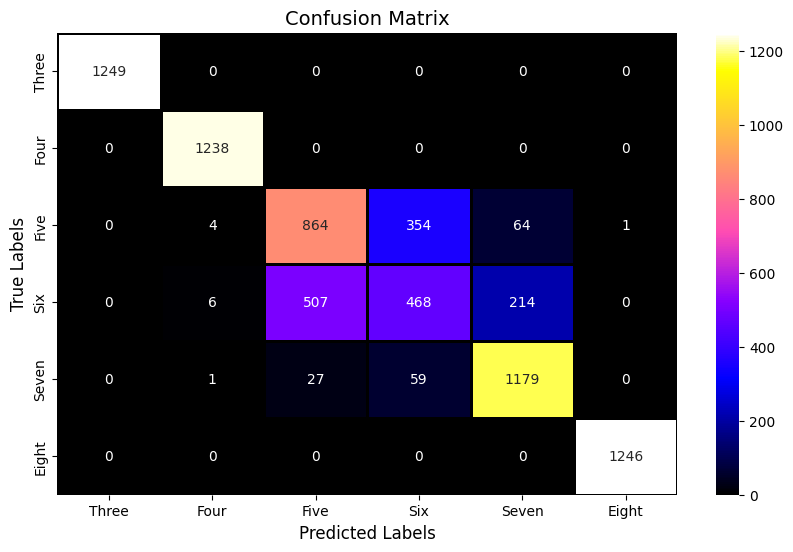

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gnuplot2", linewidths=2, linecolor="black", xticklabels=class_label, yticklabels=class_label)

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

# Predict On Test Data

In [25]:
df_test=pd.read_csv("/kaggle/input/chydv-hackathon-2025/test.csv")

In [26]:
df_test.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,15000,10.6,0.29,0.34,2.1,0.069,21.0,58.0,0.99910,3.28,0.56,9.5
1,15001,8.9,0.39,0.49,2.5,0.096,4.0,9.0,0.99720,3.26,0.53,10.0
2,15002,7.8,0.70,0.03,2.0,0.081,3.0,18.0,0.99870,3.41,0.56,12.6
3,15003,10.2,0.38,0.24,1.6,0.094,7.0,17.0,0.99562,3.15,0.62,9.9
4,15004,7.3,0.59,0.15,1.9,0.082,10.0,28.0,0.99472,3.28,0.74,10.0


In [27]:
Id=df_test.id

In [28]:
df_test.drop(columns=["id"],axis=1,inplace=True)

In [29]:
pred = model.predict(df_test)
pred = np.array(pred).ravel()

pred = np.round(pred).astype(int)

submission = pd.DataFrame({"id": Id, "quality": pred})
submission.to_csv("submission.csv", index=False)


In [30]:
submission.head()

,id,quality
0,15000,6
1,15001,7
2,15002,7
3,15003,7
4,15004,7
